## Individual Assignment 1, International Climate Policy

- Neil Stein, 12410247

- [Github URL](https://github.com/neil-stein/Assignment-2_ICP.git)

In [6]:
# Setup steps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import geopandas
import warnings
import scipy
import time
import re
warnings.filterwarnings("ignore")

# data loading steps
county_df = pd.read_csv("icp_indiv_2_county_avetemp.csv")
rep_df = pd.read_csv("icp_indiv_2_dg2011_rep_nomiss.csv")

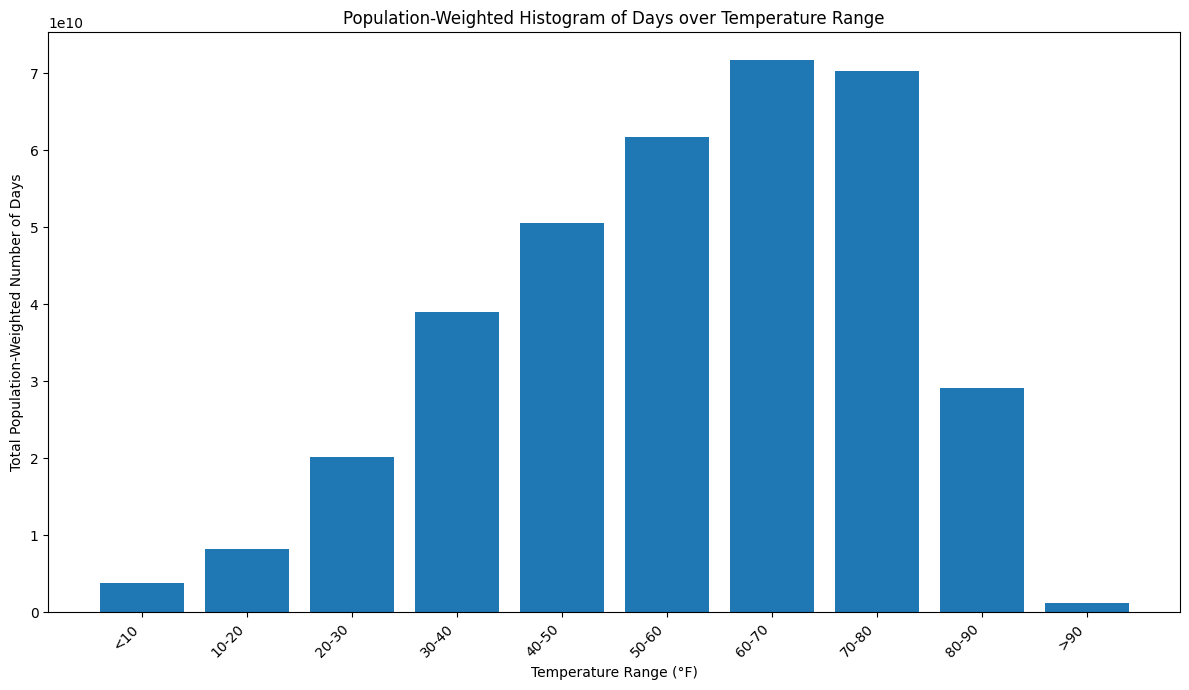

In [10]:
# Part 1(a) -- plotting temp and US population

# creating a merged dataset 
merged_df = pd.merge(rep_df, county_df, left_on= "countycode", right_on= "countycode", how= "left")

# recategorizing our temperature range columns into more precise values
temp_range_pattern = re.compile(r'tday_(lt\d+|gt\d+|\d+_\d+)')
temp_range_cols  = [col for col in merged_df.columns if temp_range_pattern.match(col)]

# duplicating the dataframe to avoid messy crossover between temperature weights
popweight_tempdf = merged_df.copy()

# applying the weights
for temp_col in temp_range_cols:
    popweight_tempdf[f'weighted_{temp_col}'] = popweight_tempdf[temp_col] * popweight_tempdf['population']

# Aggregate the population-weighted days across all rows (summing for each weighted temperature column)
total_weighted_days = popweight_tempdf[[col for col in popweight_tempdf.columns if col.startswith('weighted_tday_')]].sum()

# Prepare labels for the x-axis
bin_labels = [col.replace('weighted_tday_', '').replace('lt', '<').replace('gt', '>').replace('_', '-') for col in total_weighted_days.index]
bin_values = total_weighted_days.values

# Create the histogram
plt.figure(figsize=(12, 7))
plt.bar(bin_labels, bin_values)
plt.xlabel("Temperature Range (°F)")
plt.ylabel("Total Population-Weighted Number of Days")
plt.title("Population-Weighted Histogram of Days over Temperature Range")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Part 1(b) - number of days about 90°F as a population weighted average
# first, we need the total population in the context of this data
total_pop = popweight_tempdf['population'].sum()

# next, the population weighted days above 90°F
total_above90 = popweight_tempdf['weighted_tday_gt90'].sum()

# last, creating our population weighted average
popweight_avg_over90 = total_above90/total_pop
print(f'The population-weighted average number of days above 90°F per year across the US is: {popweight_avg_over90:.2f} days.')

The population-weighted average number of days above 90°F per year across the US is: 1.21 days.
